In [13]:
# from keras.preprocessing import image
import keras.utils as image
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
import numpy as np

model = ResNet50(weights='imagenet', include_top=False)
model.summary()

img_path = 'dataset\_k1pDi4AjG8.png'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

resnet50_feature = model.predict(img_data)

print (resnet50_feature.shape)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [14]:
from tensorflow.keras.models import Model
import os

image_features = {}
model_resnet = ResNet50()
model_resnet = Model(inputs=model_resnet.inputs,outputs = model_resnet.layers[-2].output)
model_resnet.summary()
resnet50_feature_list = []
file = 'dataset-v2\*.png'
ls = []
# for filename in os.listdir('dataset'):
#     ls.append(filename)
count = 0
for i, filename  in enumerate(os.listdir('dataset-v3')):

    
    print(i,filename)
    # process the files under the directory 'dogs' or 'cats'
    #     # ...
        
    img = image.load_img('dataset-v3\\'+filename, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    resnet_feature = model_resnet.predict(img_data)
    image_features[filename] = resnet_feature
    feature_np = np.array(resnet_feature)
    resnet50_feature_list.append(feature_np.flatten())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

(3134, 2048)


C:\Users\rawal\AppData\Local\Temp\ipykernel_26908\1671131495.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


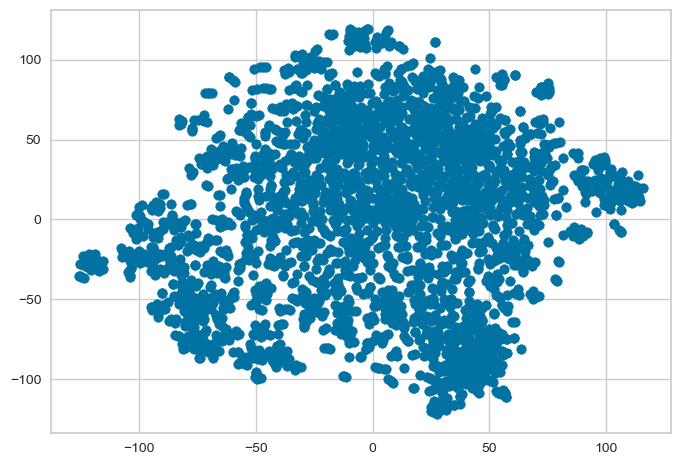

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


features = np.array(resnet50_feature_list)
print(features.shape)
tsne = TSNE(n_components=2, perplexity=10, learning_rate=350, n_iter=5000, random_state=0).fit_transform(features)
fig = plt.figure()
ax = plt.axes()
ax.scatter(tsne[:, 0], tsne[:, 1])
# plt.scatter3D(tsne[:, 0], tsne[:, 1],tsne[:,2])
fig.show()

In [16]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))


0 -1gyxuGDs1U.png
1 -28pKoQdMl8.jpg
2 -378LN_fUqE.jpg
3 -4zrvLIvs4c.png
4 -53kaP6dZeI.jpg
5 -6BvA4U1dLI.jpg
6 -6Up7CG5d6M.jpg
7 -8pCMoL_b_s.jpg
8 -8tk0uk17gc.jpg
9 -9JQndAAvLE.jpg
10 -9kzxE3PfE8.jpg
11 -A3IlRATIsI.jpg
12 -AkTLfreP2M.png
13 -BRSus9eU10.jpg
14 -c0e7821tHs.png
15 -cPdImejxEQ.jpg
16 -dmiS_6YrGU.jpg
17 -E_TWPCkqy4.jpg
18 -fDVHJoZArg.png
19 -gal8E_dgE8.jpg
20 -gZLTLmZBGM.jpg
21 -Jl2Hc2DTKc.png
22 -k-V3ESHcfA.jpg
23 -ldA6PCa1kM.png
24 -LKVUarhtvE.jpg
25 -LqbAMHGMTk.png
26 -mgqMpWKEBk.jpg
27 -naamtpQ8lw.jpg
28 -nd7n0gqAmI.png
29 -NPmBkYb_mY.jpg
30 -nSHiHO6QJI.jpg
31 -ny03ousWJo.jpg
32 -O9qlFkYMPg.png
33 -pAOuR8s03Q.jpg
34 -q7EvLhOK08.jpg
35 -QTo3nfmWUc.png
36 -qv7k2_lc0M.jpg
37 -RCnNyD0L-s.jpg
38 -S4CwK5Z5Xg.png
39 -T-nJ2Wpw7k.png
40 -tBy2jemw4s.jpg
41 -TfgtjrXCHk.png
42 -UdWguw90g4.jpg
43 -VRx0GRo-Ws.jpg
44 -wmfpoq_Y0E.jpg
45 -Xb6JoucBXM.png
46 -xBAM1TRSKA.png
47 -XbX4eQlwgs.jpg
48 -xfra2_tVF8.jpg
49 -xl0Com4ElM.png
50 -XTnL4Mang0.jpg
51 -ybiXR2WCFQ.jpg
52 -ZgukO7zXPw.png
53 

C:\Users\rawal\AppData\Local\Temp\ipykernel_26908\531795428.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)


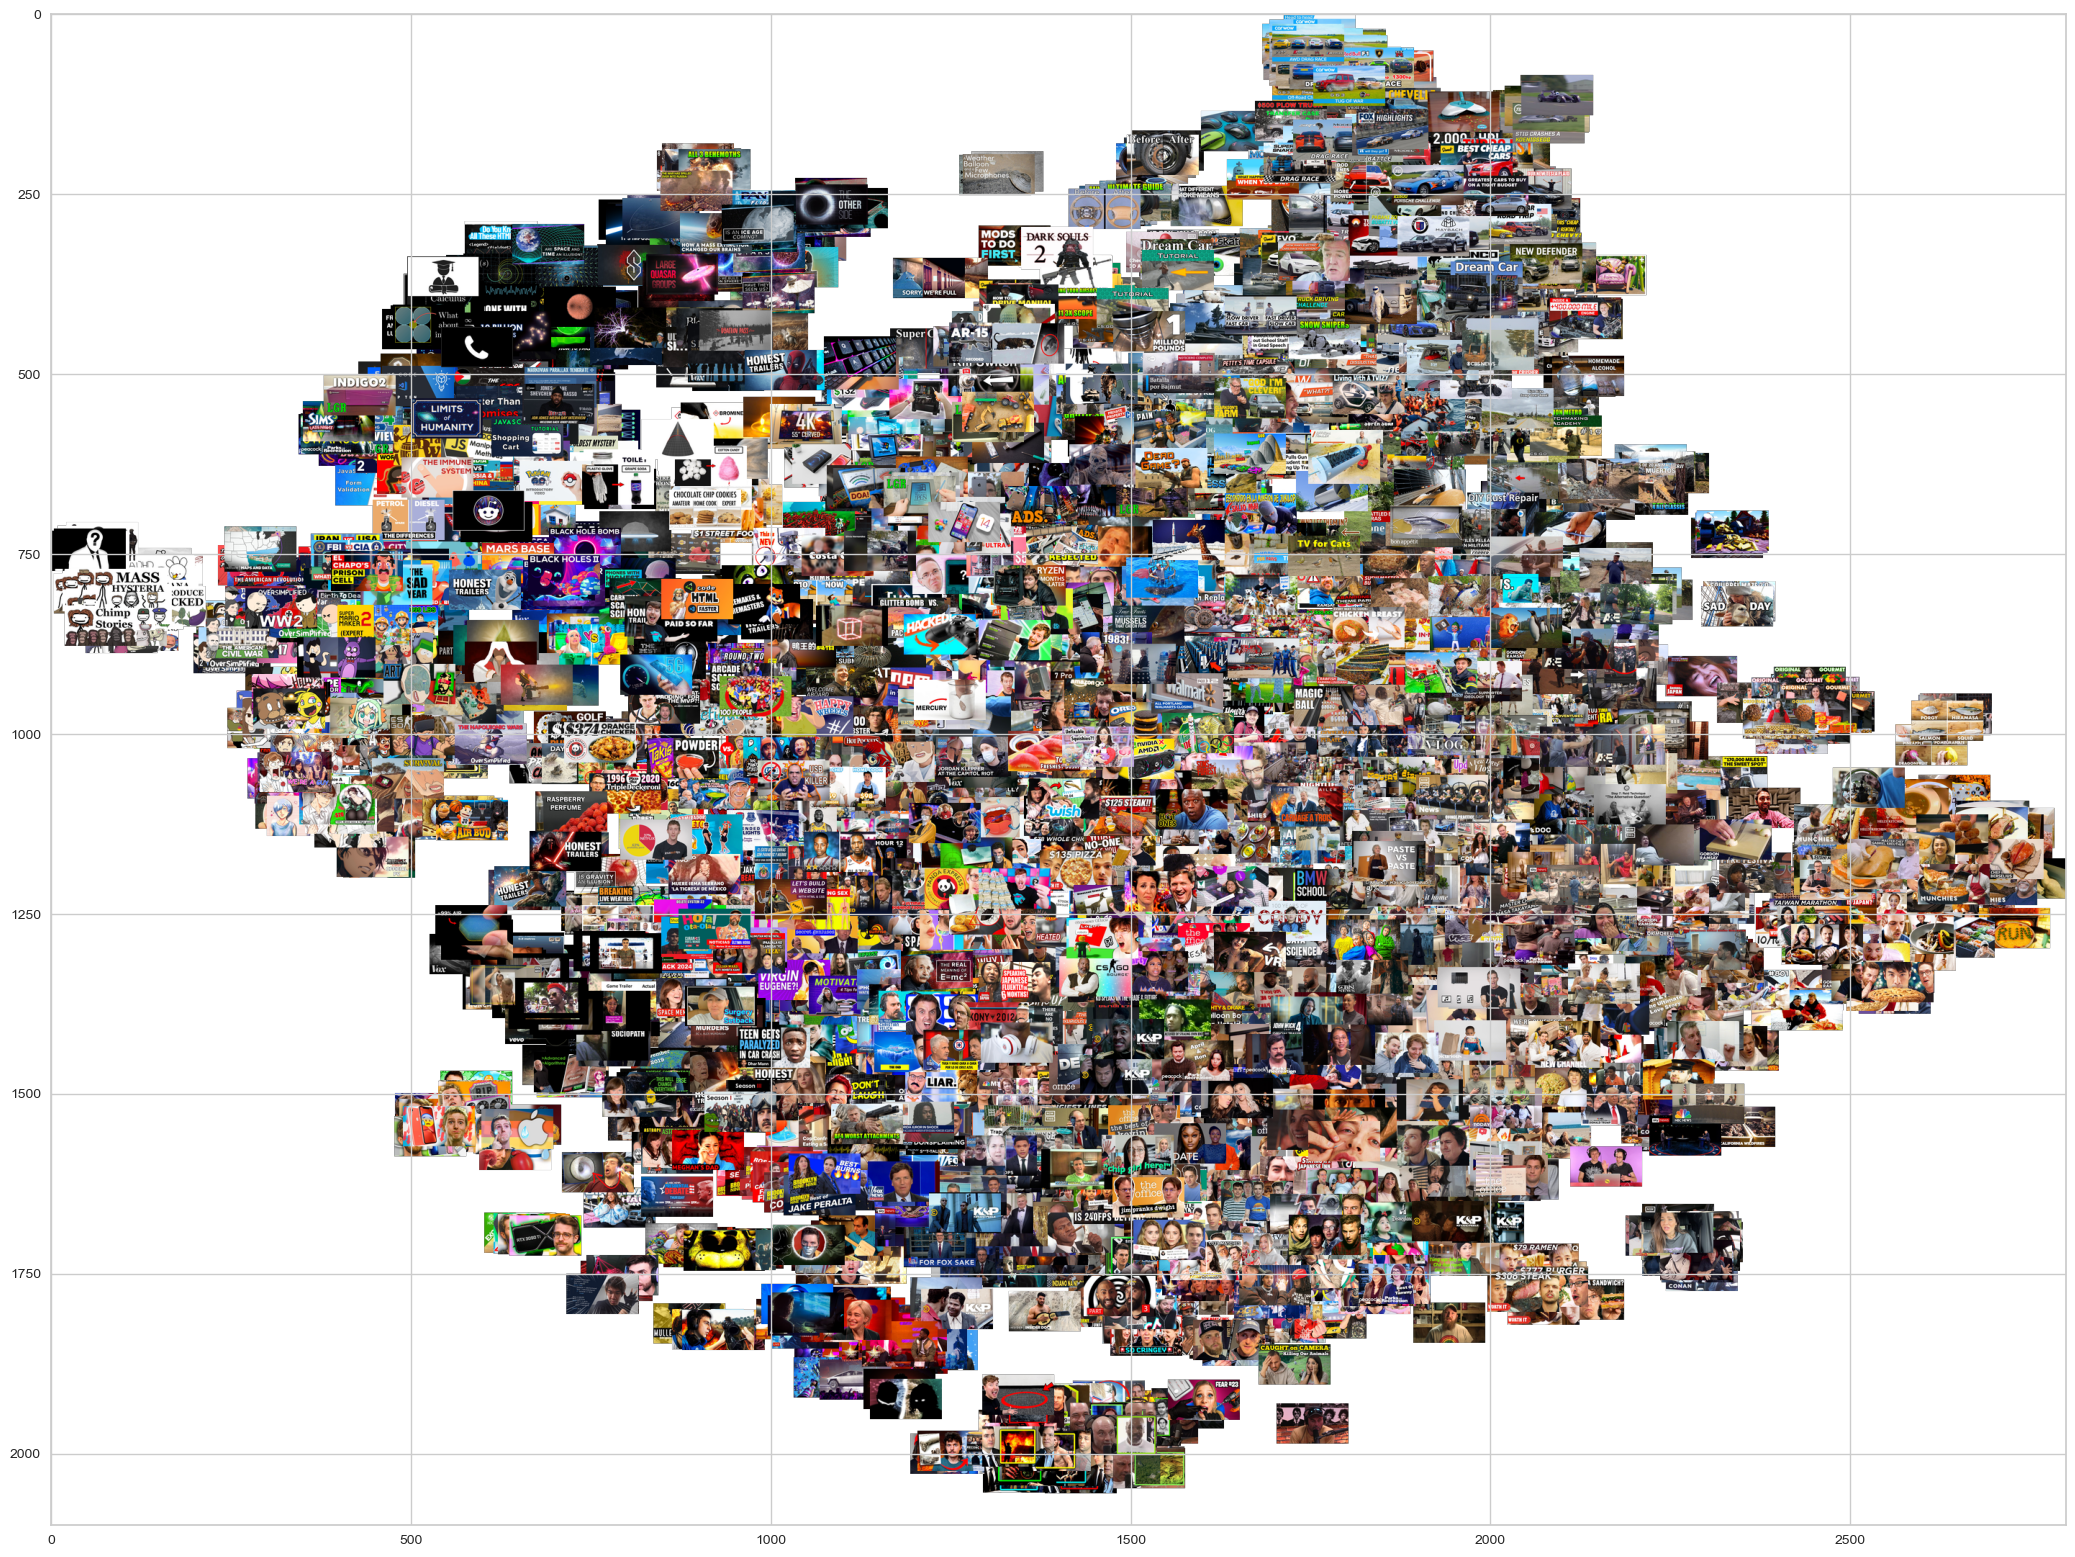

In [17]:
r = 0.7
from PIL import Image

width = int(4000*r)
height = int(3000*r)
max_dim = 100
images = []
for i, filename  in enumerate(os.listdir('dataset-v3')):
    print(i,filename)
    # process the files under the directory 'dogs' or 'cats'
    #     # ...
        
    img = image.load_img('dataset-v3\\'+filename)
    images.append(img)
full_image = Image.new('RGBA', (width, height))


for img, x, y in zip(images, tx, ty):
    tile = img
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize = (26,26))
plt.imshow(full_image)

c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available t

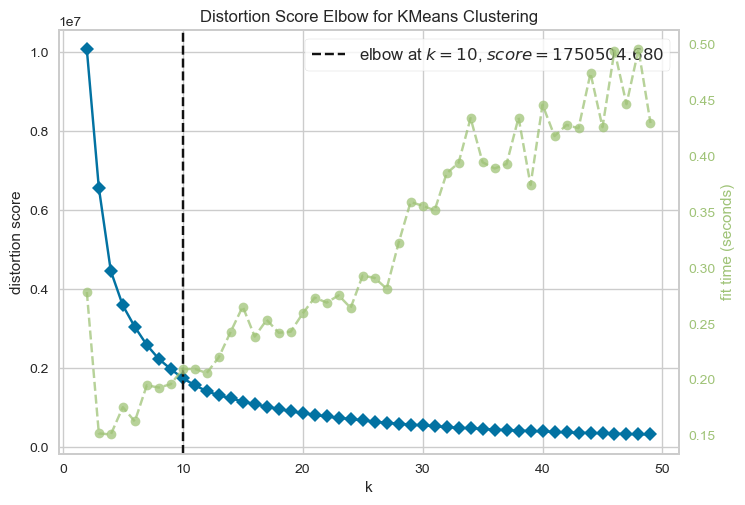

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2,50))
visualizer.fit(tsne)
visualizer.show()

c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


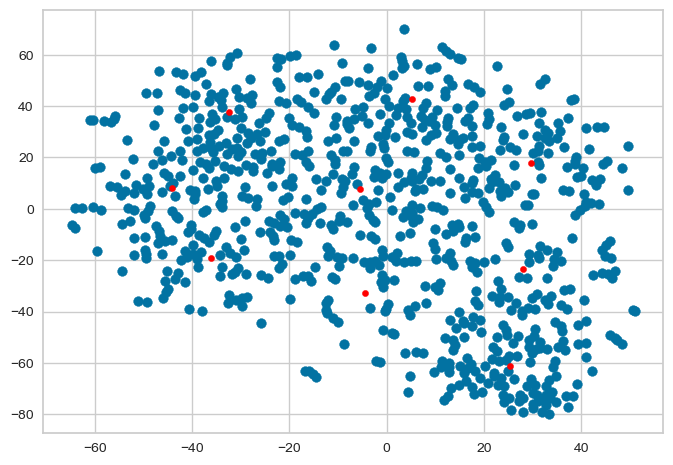

In [9]:
kmeans = KMeans(n_clusters=9,random_state=0).fit(tsne)
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=20,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()


In [10]:
import pandas as pd
data = []
labels = kmeans.labels_
for i in range(0,len(tsne)):
    x = tsne[i][0]
    y = tsne[i][1]
    pred = labels[i]
    data.append(
        {
            'X' : x,
            'Y' : y,
            'Cluster' : pred
        }
    )
# print(data)
df = pd.DataFrame(data)
df.head(10)

X          Y  Cluster
0  16.724514 -62.051239        2
1 -38.019623 -39.869625        3
2  17.518906   9.959927        8
3  10.189159  29.517511        1
4  -4.936583   3.349753        6
5 -42.356373  46.113312        7
6 -45.853363 -34.781475        3
7   5.048313  33.448147        1
8  27.112631 -26.733223        4
9 -54.418583 -24.032843        3

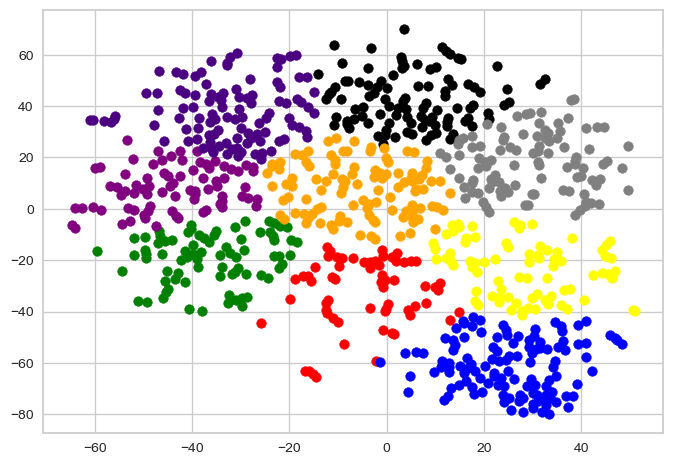

In [11]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label_0 = df.loc[df['Cluster'] == 0]
filtered_label_1 = df.loc[df['Cluster'] == 1]
filtered_label_2 = df.loc[df['Cluster'] == 2]
filtered_label_3 = df.loc[df['Cluster'] == 3]
filtered_label_4 = df.loc[df['Cluster'] == 4]
filtered_label_5 = df.loc[df['Cluster'] == 5]
filtered_label_6 = df.loc[df['Cluster'] == 6]
filtered_label_7 = df.loc[df['Cluster'] == 7]
filtered_label_8 = df.loc[df['Cluster'] == 8]
filtered_label_9 = df.loc[df['Cluster'] == 9]

# filtered_label_0.head(10)
#plotting the results
plt.scatter(filtered_label_0['X'] , filtered_label_0['Y'], color ='red')
plt.scatter(filtered_label_1['X'] , filtered_label_1['Y'], color ='black')
plt.scatter(filtered_label_2['X'] , filtered_label_2['Y'], color ='blue')
plt.scatter(filtered_label_3['X'] , filtered_label_3['Y'], color ='green')
plt.scatter(filtered_label_4['X'] , filtered_label_4['Y'], color ='yellow')
plt.scatter(filtered_label_5['X'] , filtered_label_5['Y'], color ='purple')
plt.scatter(filtered_label_6['X'] , filtered_label_6['Y'], color ='orange')
plt.scatter(filtered_label_7['X'] , filtered_label_7['Y'], color ='indigo')
plt.scatter(filtered_label_8['X'] , filtered_label_8['Y'], color ='gray')
plt.scatter(filtered_label_9['X'] , filtered_label_9['Y'])
plt.show()

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score, cohen_kappa_score, calinski_harabasz_score, davies_bouldin_score
print(davies_bouldin_score(tsne, kmeans.labels_))
print(calinski_harabasz_score(tsne, kmeans.labels_))
print(silhouette_score(tsne, kmeans.labels_))

0.806947485945214
913.0898265549631
0.37898663
